## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

   label  type  site_admin  company   blog  ...  followers  following  \
0  Human  True       False    False  False  ...          5          1   
1  Human  True       False    False   True  ...          9          6   
2  Human  True       False     True   True  ...       1212        221   
3    Bot  True       False    False  False  ...         84          2   
4  Human  True       False    False  False  ...          6          2   

                  created_at                 updated_at  text_bot_count  
0  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0  
1  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0  
2  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0  
3  2014-05-20 18:43:09+00:00  2023-10-12 12:54:59+00:00               0  
4  2012-08-16 14:19:13+00:00  2023-10-06 11:58:41+00:00               0  

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (tota

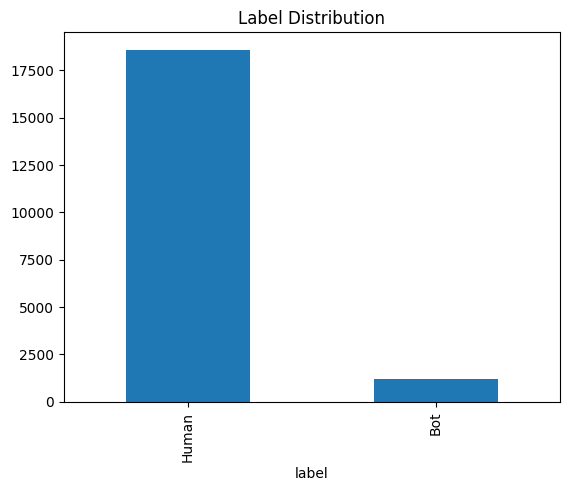

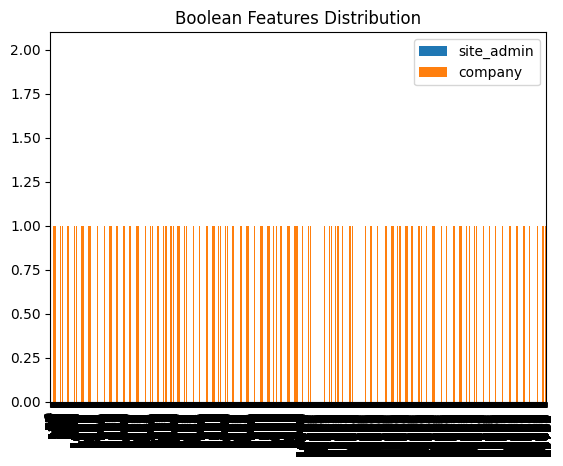

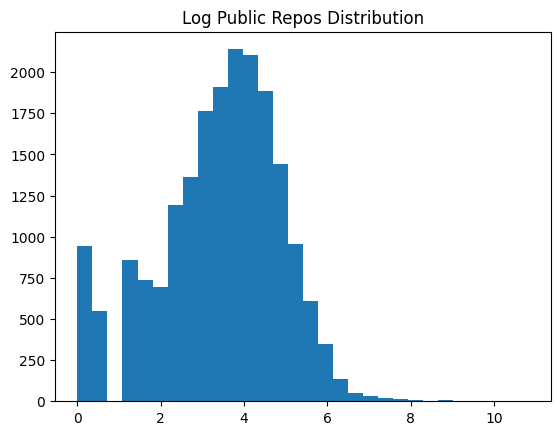

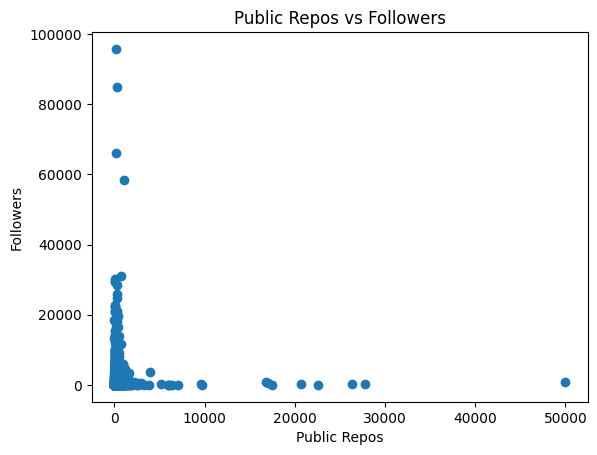

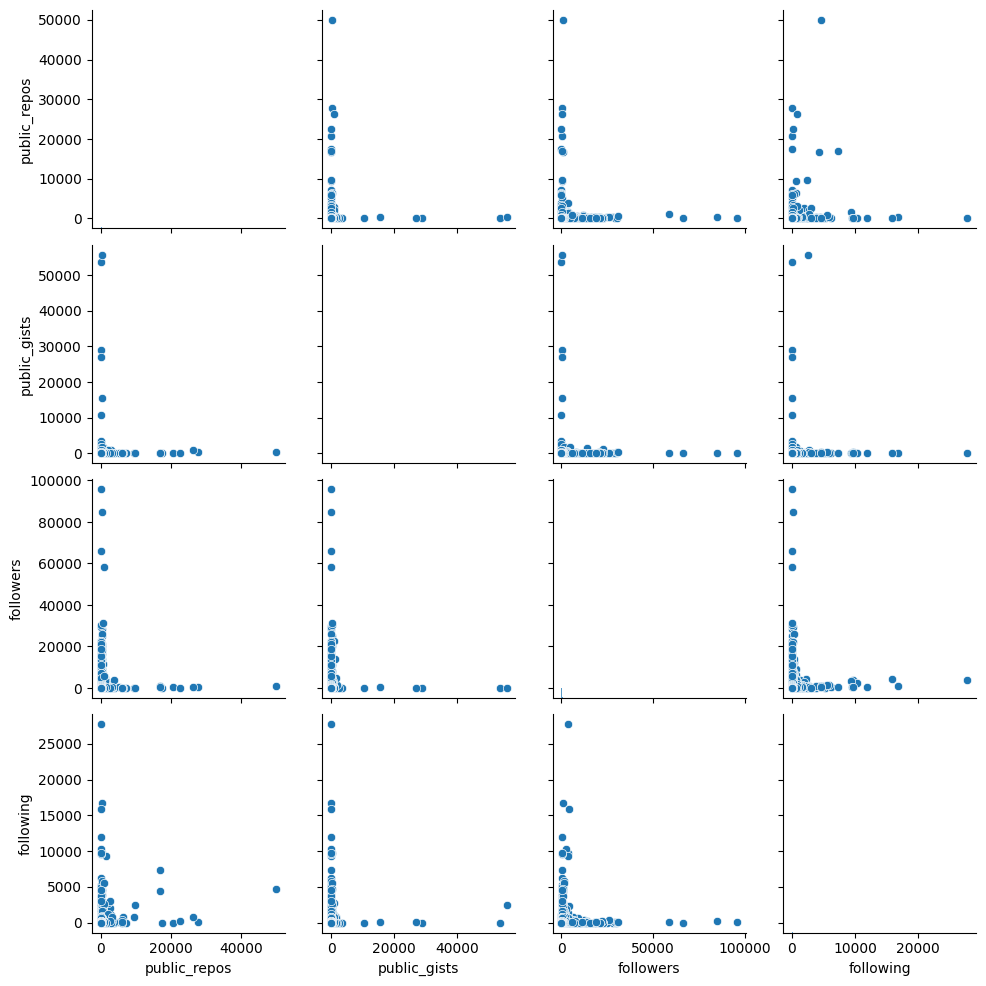

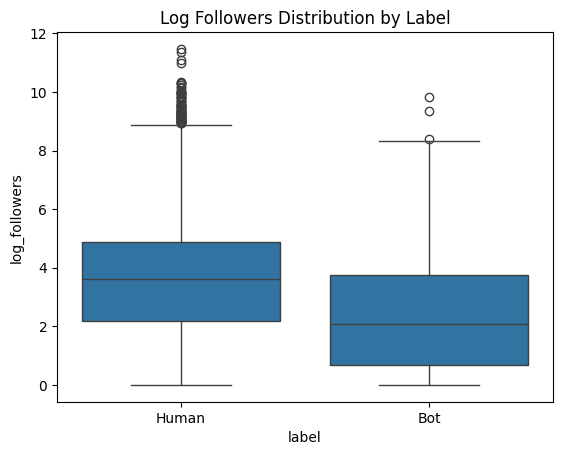

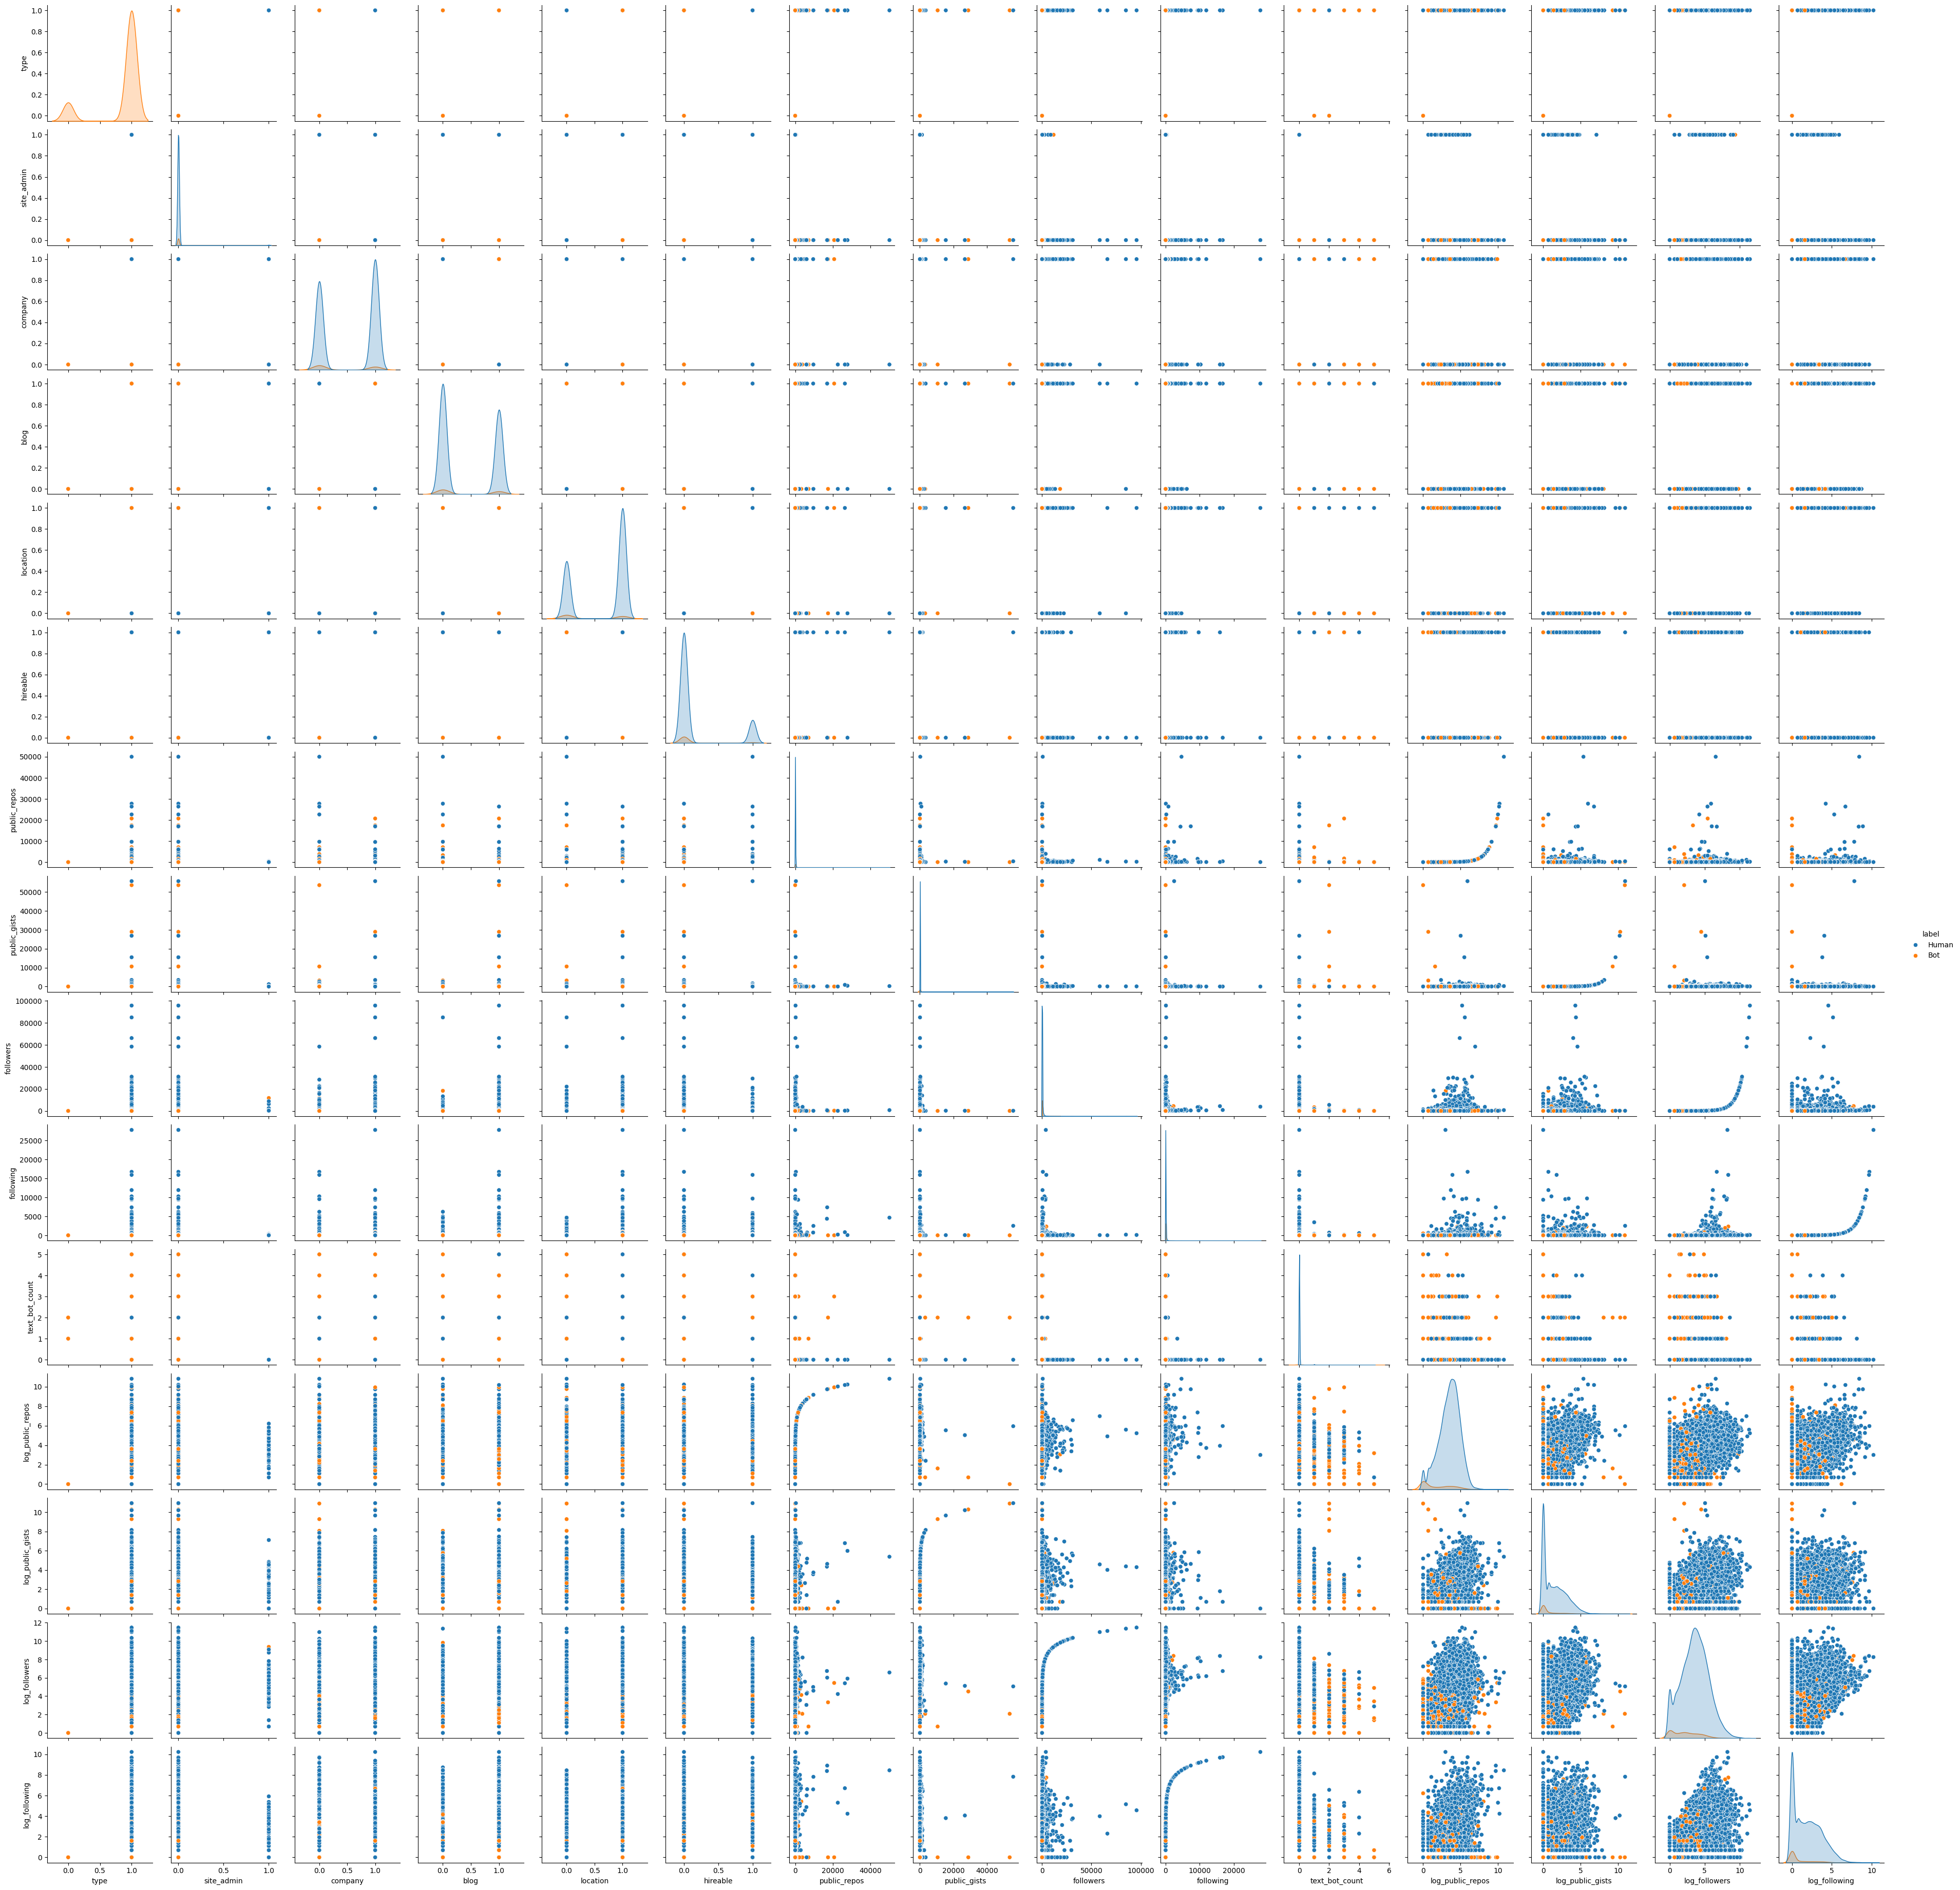

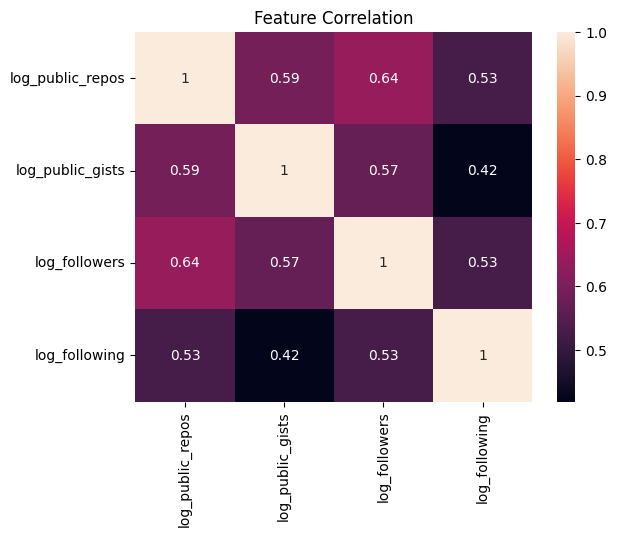

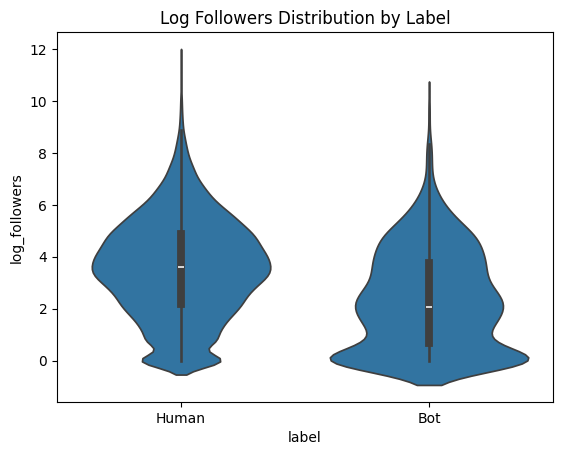

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as yp
import numpy as np

# 1. 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 设置显示选项
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)

# 2. 查看数据的前几行和信息
print(data.head())
print(data.info())

# 生成描述性统计信息
print(data.describe())

# 3. 数据格式化处理
# 假设有日期列 'date_column'，将其转换为日期格式
# data['date_column'] = pd.to_datetime(data['date_column'])

# 4. 对数变换
data['log_public_repos'] = np.log1p(data['public_repos'])
data['log_public_gists'] = np.log1p(data['public_gists'])
data['log_followers'] = np.log1p(data['followers'])
data['log_following'] = np.log1p(data['following'])

# 5. 使用Matplotlib绘制图表
# 条形图
data['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.show()

# 堆积柱状图
data[['site_admin', 'company']].astype(int).plot(kind='bar', stacked=True)
plt.title('Boolean Features Distribution')
plt.show()

# 直方图
plt.hist(data['log_public_repos'], bins=30)
plt.title('Log Public Repos Distribution')
plt.show()

# 散点图
plt.scatter(data['public_repos'], data['followers'])
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 散点矩阵
sns.pairplot(data[['public_repos', 'public_gists', 'followers', 'following']])
plt.show()

# 6. 使用Seaborn绘制图表
# 箱线图
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Log Followers Distribution by Label')
plt.show()

# 热图
sns.heatmap(data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr(), annot=True)
plt.title('Feature Correlation')
plt.show()

# 小提琴图
sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Log Followers Distribution by Label')
plt.show()

# 7. 生成交互式数据分析报告
profile = yp.ProfileReport(data, title='Pandas Profiling Report')
profile.to_file("output.html")
